In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
'''
Drop unused features.
'''

data = data.drop(["Condition1", "Condition2",
                 "MiscVal", "MiscFeature", "GarageYrBlt",
                 "GarageCars", "GarageFinish", "GarageType",
                 "Fireplaces", "FireplaceQu", "PavedDrive", "MasVnrArea",
                  "MasVnrType", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                  "ScreenPorch", "BsmtFinType1", "BsmtFinType2",
                  "BsmtFinSF1", "BsmtFinSF2", "Id", "PoolQC", "Fence",
                  "Alley", "PoolArea", "Exterior1st", "Exterior2nd", "Street",
                  "BsmtExposure", "MoSold", "YrSold", "YearBuilt", "Heating",
                  "SaleType", "SaleCondition", "GarageQual", "CentralAir", "Utilities", "BsmtQual",
                  "Electrical", "BsmtCond", "GarageCond", "OverallCond", "KitchenAbvGr", "BedroomAbvGr", "BsmtUnfSF",
                  "Functional", "LandContour", "BldgType", "RoofStyle", "RoofMatl", "LotFrontage", "LandSlope",
                  ], axis=1)

In [134]:
Counter(data.RoofMatl)

AttributeError: 'DataFrame' object has no attribute 'RoofMatl'

In [4]:
'''
summarize all bathrooms data into one.
'''
data['bathrooms'] = data[["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]].sum(axis=1)
data = data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)
data.insert(0, 'bathrooms', data.pop('bathrooms'))

In [5]:
'''
Remove outliers
'''
# data = data[data["LotFrontage"] < 200]
data = data[data["LotArea"] < 100000]
data = data[data["TotalBsmtSF"] < 4000]
data = data[data["GrLivArea"] < 4000]
"""
Get all numerical features
"""
# data_num = data.select_dtypes(include = ['float64', 'int64']).drop(["MSSubClass"], axis=1)
# for col in data_num.columns:
#     data[col] = data[col].fillna(0)

'\nGet all numerical features\n'

In [6]:
"""
Deal with categorical data
"""

df_cat = data.select_dtypes(include = ['object'])

df_cat['MSSubClass'] = data['MSSubClass']

categorical_col = df_cat.columns
for col in categorical_col:
    data[col] = data[col].fillna("NA")


In [7]:
"""
Ordinal: HeatingQC, LotShape, LandContour, LandSlope, ExterQual, ExterCond, HeatingQC, KitchenQual, Functional.
Nominal: LotConfig, Neighborhood, HouseStyle, RoofStyle, RoofMatl, Foundation, MSZoning, BldgType, MSSubClass
"""
from collections import Counter
data_cat_nominal = df_cat[["LotConfig", "Neighborhood", "HouseStyle", "Foundation", "MSZoning" , "MSSubClass"]]
data_cat_ordinal = df_cat[["HeatingQC", "LotShape", "ExterQual", "ExterCond", "KitchenQual"]]

data_cat_col_dict = {}
for col in data_cat_ordinal.columns:
    data_cat_col_dict[col] = (Counter(data[col]))
data_cat_col_dict

{'HeatingQC': Counter({'Ex': 736, 'Gd': 240, 'TA': 426, 'Fa': 49, 'Po': 1}),
 'LotShape': Counter({'Reg': 925, 'IR1': 480, 'IR2': 39, 'IR3': 8}),
 'ExterQual': Counter({'Gd': 486, 'TA': 903, 'Ex': 49, 'Fa': 14}),
 'ExterCond': Counter({'TA': 1274, 'Gd': 146, 'Fa': 28, 'Po': 1, 'Ex': 3}),
 'KitchenQual': Counter({'Gd': 584, 'TA': 733, 'Ex': 96, 'Fa': 39})}

In [8]:
"""
Encode ordinal categorical variable.
"""

heatingQC_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
LotShape_dict = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
ExterQual_dict = {'Gd': 3, 'TA': 2, 'Ex': 1, 'Fa': 0}
ExterCond_dict = heatingQC_dict
KitchenQual_dict = heatingQC_dict

data['HeatingQC'] = data['HeatingQC'].replace(heatingQC_dict).astype("int64")
data['LotShape'] = data['LotShape'].replace(LotShape_dict).astype("int64")
data['ExterQual'] = data['ExterQual'].replace(ExterQual_dict).astype("int64")
# data['ExterCond'] = data['ExterCond'].replace(ExterCond_dict).astype("int64")
data['KitchenQual'] = data['KitchenQual'].replace(KitchenQual_dict).astype("int64")

# for col in data_cat_ordinal.columns:
#     # data[col] = data[col].fillna("NA")
#     data[col] = data[col].astype("int64")


corr = data.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = corr[abs(corr) > -100].sort_values(ascending=False)
print("Correlation:\n{}".format(golden_features_list))



Correlation:
OverallQual     0.802832
GrLivArea       0.720183
KitchenQual     0.669496
TotalBsmtSF     0.643992
GarageArea      0.638284
bathrooms       0.613124
TotRmsAbvGrd    0.538858
YearRemodAdd    0.524355
HeatingQC       0.440424
LotArea         0.369953
ExterQual       0.283094
MSSubClass     -0.087600
LotShape       -0.260805
Name: SalePrice, dtype: float64


/var/folders/t7/jg5qdbm57gv0xlsy9nhjgtcw0000gn/T/ipykernel_60397/976142348.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice


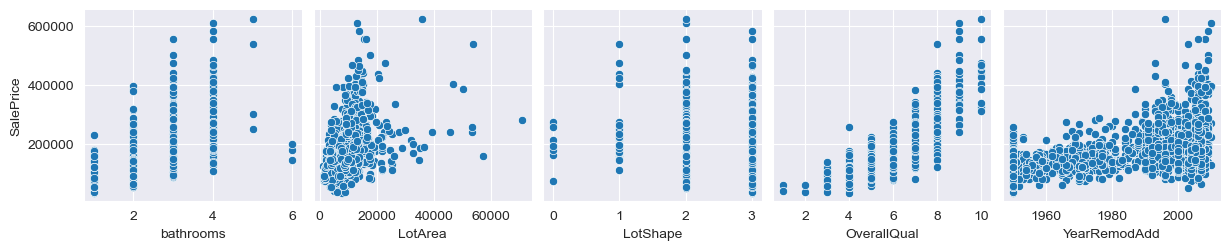

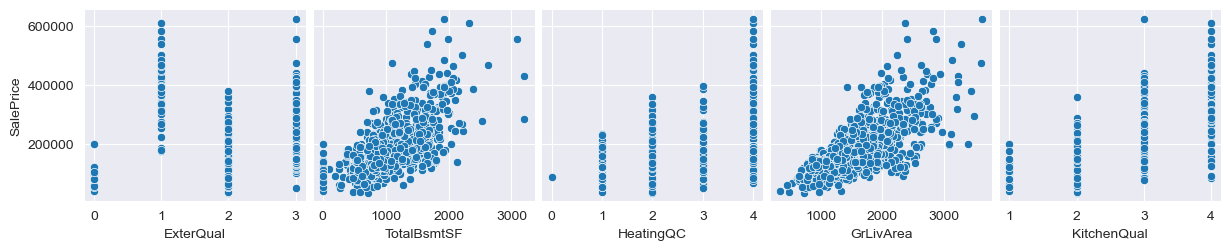

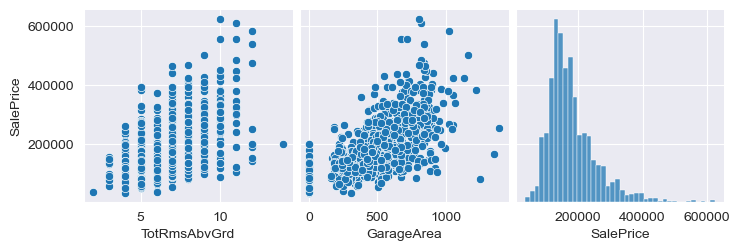

In [11]:
data_num = data.select_dtypes(include=['float64', 'int64']).drop(["MSSubClass"], axis=1)
for col in data_num.columns:
    data[col] = data[col].fillna(0)
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data,
                 x_vars=data_num.columns[i:i + 5],
                 y_vars=['SalePrice'])

/var/folders/t7/jg5qdbm57gv0xlsy9nhjgtcw0000gn/T/ipykernel_60397/2662176241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations


<Axes: >

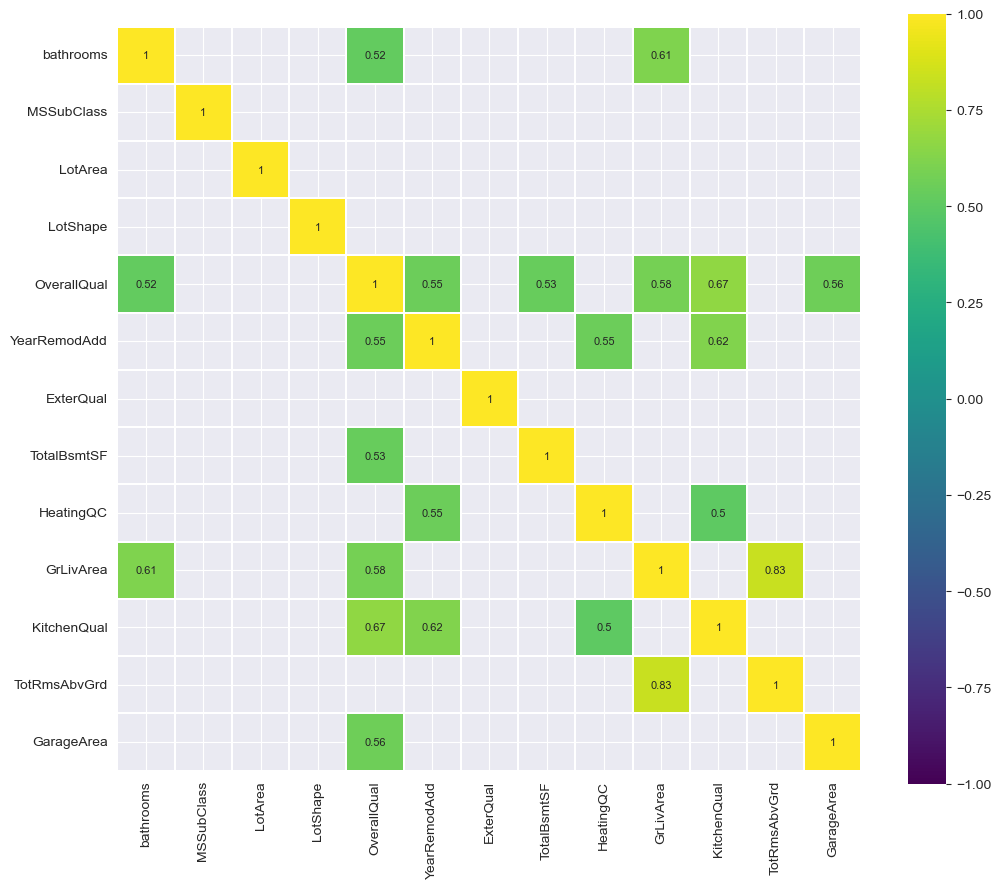

In [9]:
corr = data.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -2)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2

data_num = data_num.drop(['SalePrice'], axis=1, errors='ignore')
# data = data.drop("MSSubClass", axis=1)
for col in data_num:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
data_cat = data.select_dtypes(include = ['category'])


numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")),
        # ("scaler", StandardScaler())
    ]
)
categorical_nominal_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, data_num.columns),
        ("cat", categorical_nominal_transformer, data_cat_nominal.columns),
    ]
)


In [16]:
y = data['SalePrice']
X = data.drop(['SalePrice'], axis=1)
random_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("regression", RandomForestRegressor())]
)
decision_tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("regression", DecisionTreeRegressor())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
decision_tree.fit(X_train, y_train)
# print(decision_tree.score(X_test, y_test))
# random_forest.fit(X_train, y_train)
# print(random_forest.score(X_test, y_test))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['bathrooms', 'LotArea', 'LotShape', 'OverallQual', 'YearRemodAdd',
       'ExterQual', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageArea'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LotConfig', 'Neighborhood', 'HouseStyle', 'Foundation', 'MSZoning',
       'MSSubClass'],
      dtype='object'))])),
                ('regression', DecisionTreeRegressor())])

IndexError: index 56 is out of bounds for axis 0 with size 19

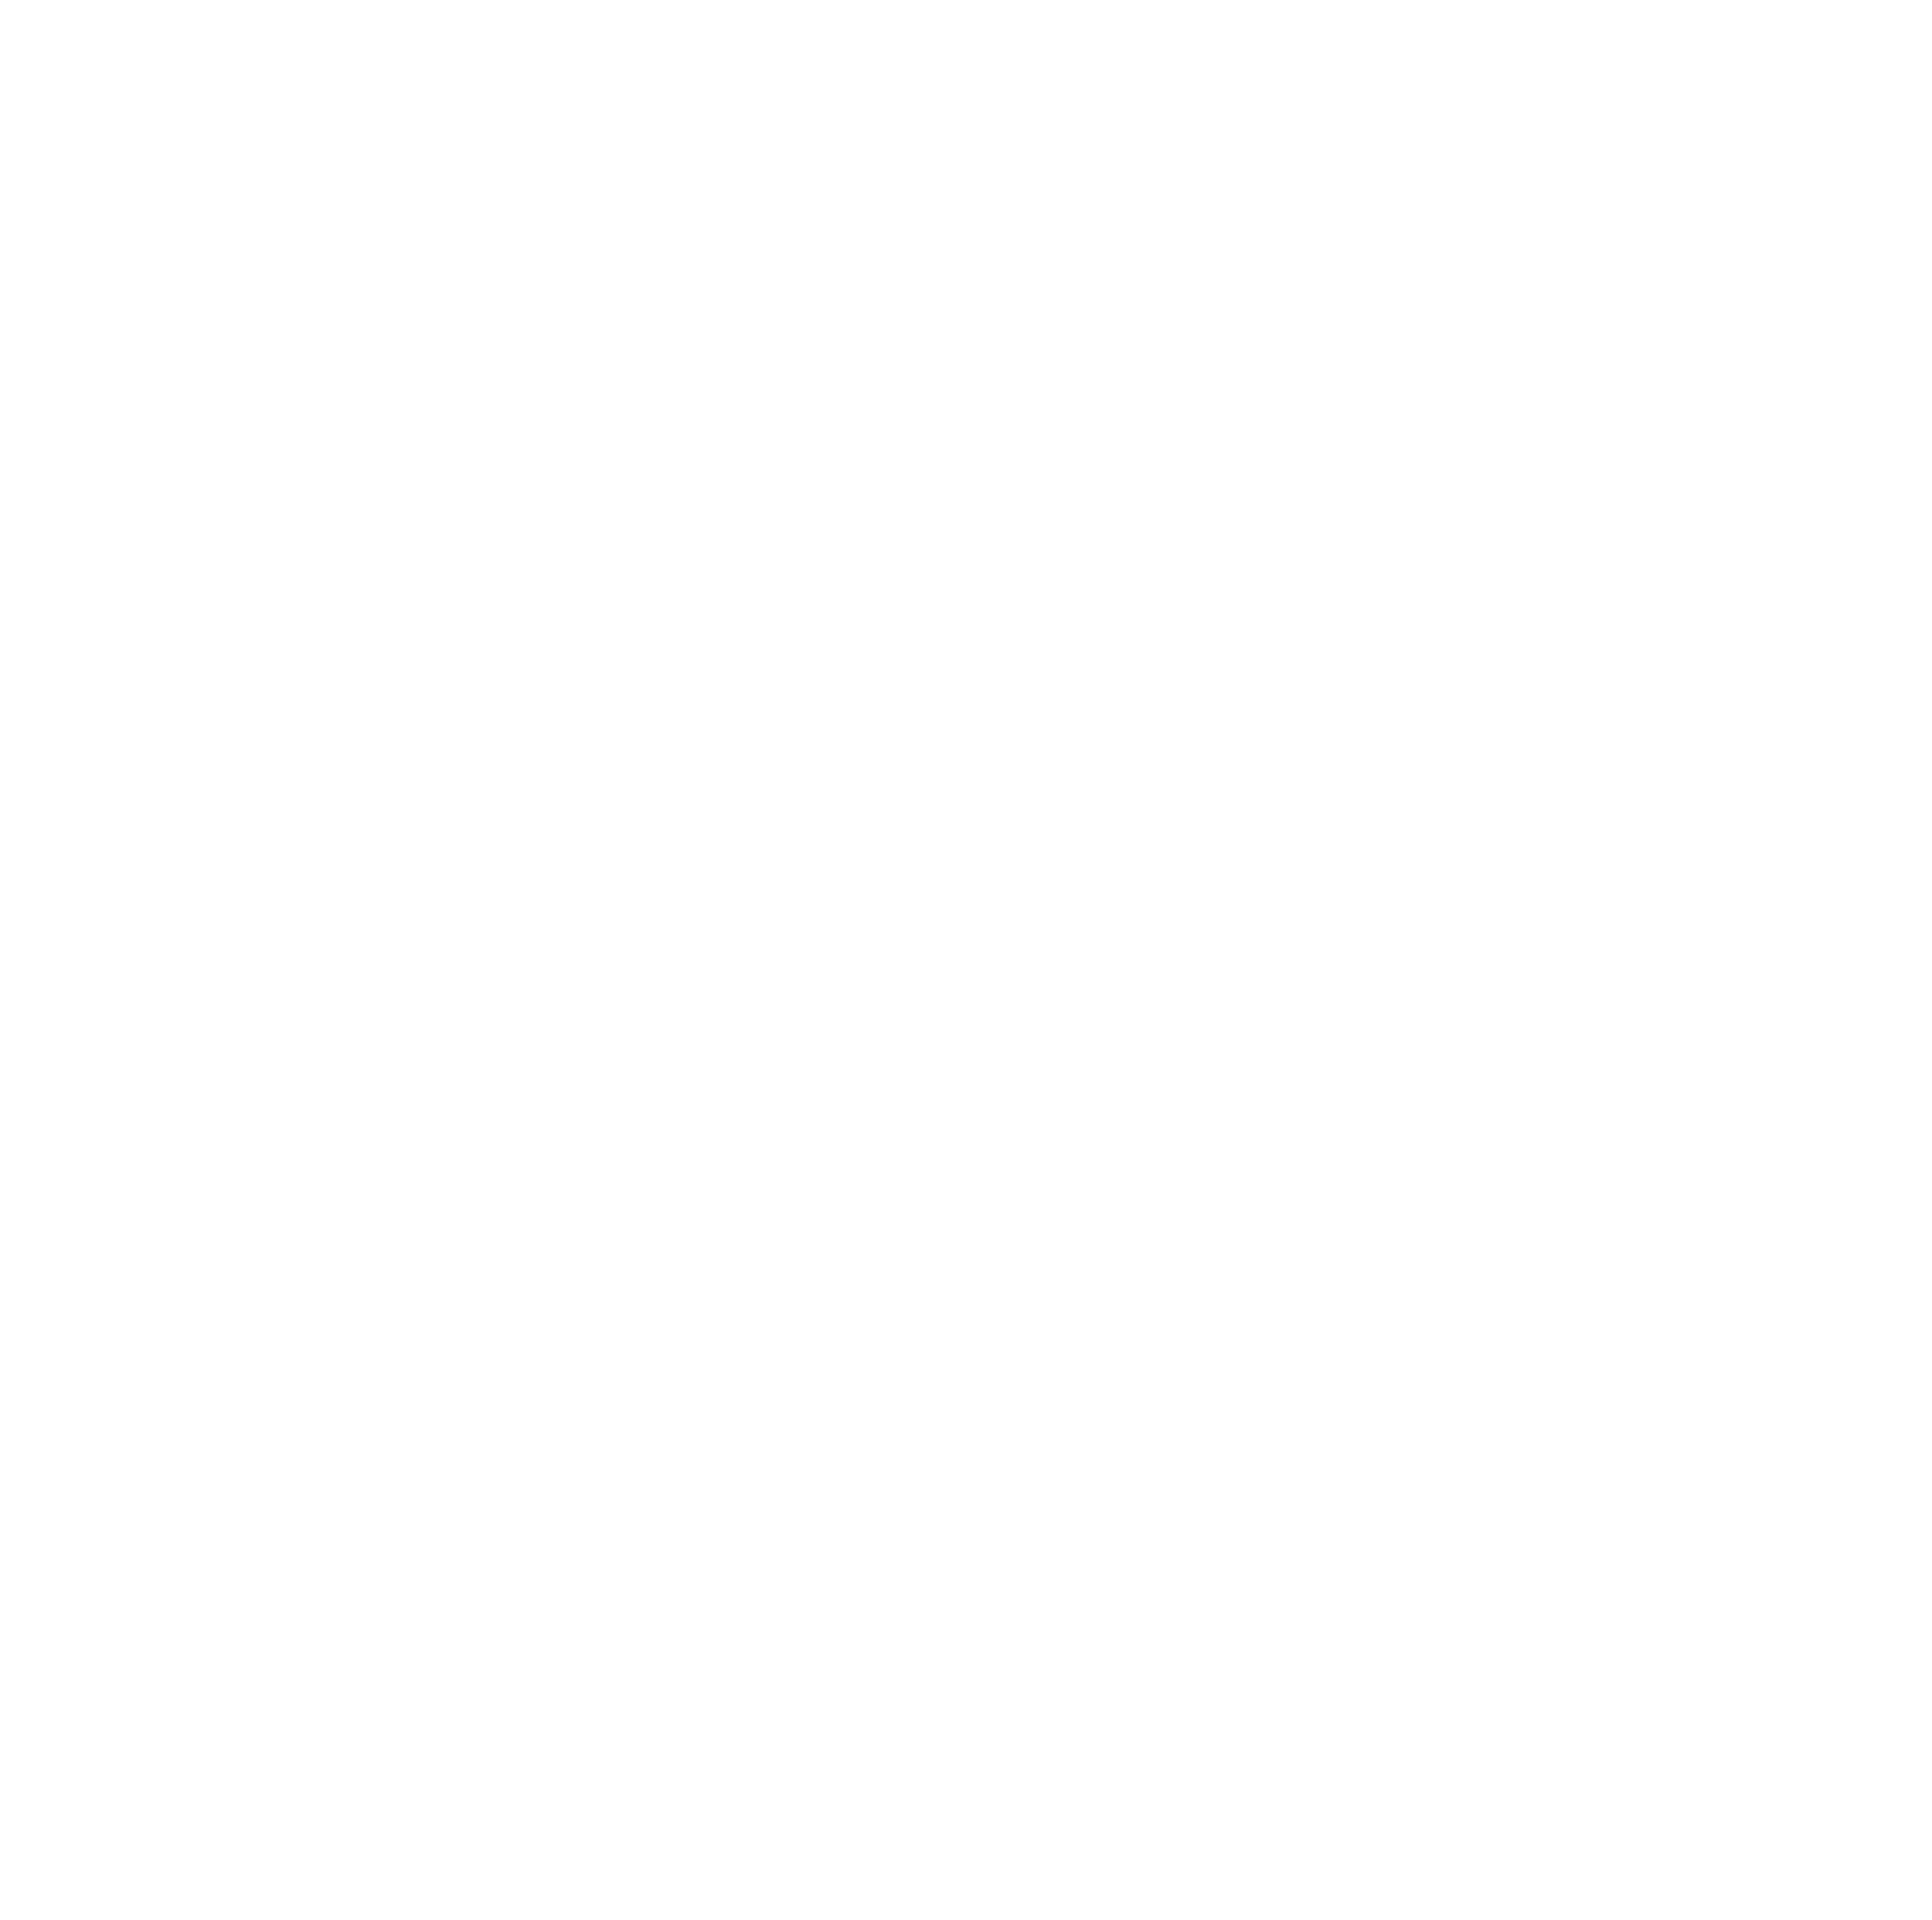

In [15]:
fig = plt.figure(figsize=(30, 30))
vis = plot_tree(decision_tree["regression"], feature_names=X_train.columns,fontsize=9, proportion=True, filled=True, rounded=True)